# Parámetros a estimar: $M, a, z_0, R, x_0$

In [34]:
import emcee
import corner #gráficar las figuras de las piramides y contornos.
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator, NullFormatter 
import math #importa paqueterías de matematicas
from math import log10 #importar log_10
from scipy.integrate import quad as intquad # para integrar

# Exportando datos

In [35]:
#We only export the redshift velocities.
vel_obs = np.genfromtxt('red.txt', usecols=1) 
x_pos = np.genfromtxt('red.txt', usecols=5) 
x_pos_Error = np.genfromtxt('red.txt', usecols=6)
y_pos = np.genfromtxt('red.txt', usecols=7) 
uel_obs = np.genfromtxt('blue.txt', usecols=1) 
z_pos = np.genfromtxt('blue.txt', usecols=5) 
z_pos_Error = np.genfromtxt('blue.txt', usecols=6)
w_pos = np.genfromtxt('blue.txt', usecols=7) 

In [36]:
## Estamos Checando la longitud de los datoa y que este llamando los datos correctamente.
#len(uel_obs)
#(vel_obs[0], x_pos[0], x_pos_Error[0], y_pos[0], y_pos_Error[0])

# General fixed values

In [37]:
c = 299792.458  # Speed of light
alphaFijo = (1.10806*(10.**3.)/299792.458)**2  #
sigmatheta=0.0837758 #masers' dispertion
inclinationo=1.25664 #the inclination of the disk
ybho=0.55 #the BH's height
a=0.
g=(4)**(3./2.)
print(g)

8.0


# Definiendo la función $Z^{(i)}_{stat}$

In [38]:
# Red Radial Velocity


def func1_statVect(x, y, sx, v, m, xo, zo):
    "Aquí esta la funcion1"
    
    func1_stat_VecInt = 0.
    l = alphaFijo # factor de conversión
    st=sigmatheta
    io=inclinationo
    yo=ybho
    a=0.
    func1_stat_VectInt=v/c-(1.-0.5*(st)**2.+ (1./8.)*(st)**4.)*((np.abs(x-xo)**(1./4.))*(np.abs(x-xo)**(3./2.)-2.*l*m*np.sqrt(np.abs(x-xo))+a*(l*m)**(3./2.)+np.sqrt(l*m)*np.sqrt(np.abs((x-xo)**2.-2.*l*m*np.abs(x-xo)+(l*m*a)**2.)))/(np.abs(x-xo-2.*l*m)*(np.sqrt(np.abs(np.abs(x-xo)**(3./2.)-3*l*m*np.sqrt(np.abs(x-xo))+2*(l*m)**(3/2.)*a))))-1.+zo)
    
    return func1_stat_VectInt 

# La siguiente funcion no depende de v y vo, pero de todos modos mantuve estas variables...

def func2_statVect(x, y, sx, v, m, xo, zo):
    "Aquí esta la funcion2"
    l = alphaFijo
    st=sigmatheta
    io=inclinationo
    yo=ybho
    a=0.
    
    func2_stat_VecInt = 0.
    
    func2_stat_VectInt = ((np.abs(x-xo)**(1./4.))*(np.abs(x-xo)**(3./2.)-2.*l*m*np.sqrt(np.abs(x-xo))+a*(l*m)**(3./2.)+np.sqrt(l*m)*np.sqrt(np.abs((x-xo)**2.-2.*l*m*np.abs(x-xo)+(l*m*a)**2.)))/(np.abs(x-xo-2.*l*m)*(np.sqrt(np.abs(np.abs(x-xo)**(3./2.)-3*l*m*np.sqrt(np.abs(x-xo))+2*(l*m)**(3/2.)*a))))-1.)**2.*((sx/(2.*(x-xo)))**2.+0.5*(st)**4.)
    
    return func2_stat_VectInt 

In [39]:
func1_statVect(4.5, 0.9, 0.02, 0.02, 1449., 3.85, -.3)

0.06179648652402013

In [40]:
# Blue Radial Velocity


def func1b_statVect(z, w, sz, u, m, xo, zo):
    "Aquí esta la funcion1b"
    
    func1b_stat_VecInt = 0.
    l = alphaFijo
    st=sigmatheta
    io=inclinationo
    yo=ybho
    a=0.
    func1b_stat_VectInt=u/c-(1.-0.5*(st)**2.+ (1./8.)*(st)**4.)*((np.abs(z-xo)**(1./4.))*(np.abs(z-xo)**(3./2.)-2.*l*m*np.sqrt(np.abs(z-xo))+a*(l*m)**(3./2.)-np.sqrt(l*m)*np.sqrt(np.abs((z-xo)**2.-2.*l*m*np.abs(z-xo)+(l*m*a)**2.)))/(np.abs(z-xo-2.*l*m)*(np.sqrt(np.abs(np.abs(z-xo)**(3./2.)-3*l*m*np.sqrt(np.abs(z-xo))+2*(l*m)**(3/2.)*a))))-1.+zo)
    return func1b_stat_VectInt 

# La siguiente funcion no depende de v y vo, pero de todos modos mantuve estas variables...

def func2b_statVect(z, w, sz, u, m, xo, vo):
    "Aquí esta la funcion2b"
    l = alphaFijo
    st=sigmatheta
    io=inclinationo
    yo=ybho
    a=0.
    
    func2b_stat_VecInt = 0.
    
    func2b_stat_VectInt = ((np.abs(z-xo)**(1./4.))*(np.abs(z-xo)**(3./2.)-2.*l*m*np.sqrt(np.abs(z-xo))+a*(l*m)**(3./2.)-np.sqrt(l*m)*np.sqrt(np.abs((z-xo)**2.-2.*l*m*np.abs(z-xo)+(l*m*a)**2.)))/(np.abs(z-xo-2.*l*m)*(np.sqrt(np.abs(np.abs(z-xo)**(3./2.)-3*l*m*np.sqrt(np.abs(z-xo))+2*(l*m)**(3/2.)*a))))-1.)**2.*((sz/(2.*(z-xo)))**2.+0.5*(st)**4.) 
    
    return func2b_stat_VectInt 

In [41]:
func1b_statVect(4.5, 0.9, 0.02, 0.02, 1449., 3.85, -.3)

0.4383062150531256

# $\chi^2_{z}$. Just for illustrative purposes.

In [42]:
#def chi2_r(theta, x, y, sx, v, z, w, sz, u):
#    "Natural logarithm (ln) of the Likelihood function = -0.5 * Chi2 "
#    m, xo, vo = theta
#    
#    chi2zIntr = 0.
#    
#    ## Fixed values
#    a = alphaFijo
#    
#    for i in range(len(x)):
#        # Chi2 definition
#                chi2zIntr = (chi2zIntr + 
#                   ((func1_statVect(x[i], y[i], sx[i], v[i], m, xo, vo))**2./(
#                       func2_statVect(x[i], y[i], sx[i], v[i],  m, xo, vo))))
#    
#    lnLikelihoodInt=0.
#    lnLikelihoodInt=chi2zIntr
#        
#    return lnLikelihoodInt

In [43]:
#theta1= 3.85, -.29, 488.
#chi2_r(theta1, x_pos, y_pos, x_pos_Error, vel_obs, z_pos, w_pos, z_pos_Error, uel_obs)

In [44]:
#def chi2_b(theta, x, y, sx, v, z, w, sz, u):
#    "Natural logarithm (ln) of the Likelihood function = -0.5 * Chi2 "
#    m, xo, vo = theta
#    
#    chi2zIntb = 0.
#    
#    ## Fixed values
#    a = alphaFijo
#    
#    for j in range(len(z)):
#        # Chi2 definition
#                chi2zIntb = (chi2zIntb+((func1b_statVect(z[j], w[j], sz[j], u[j], m, xo, vo))**2./(
#                       func2b_statVect(z[j], w[j], sz[j], w[j],  m, xo, vo))))
#    
#    lnLikelihoodInt=0.
#    lnLikelihoodInt=chi2zIntb
#        
#    return lnLikelihoodInt
#
#

In [45]:
#theta1= 3.85, -.29, 488.
#chi2_b(theta1, x_pos, y_pos, x_pos_Error, vel_obs, z_pos, w_pos, z_pos_Error, uel_obs)

## $\ln({\rm Likelihood}_{\rm z}) = -0.5 \chi^2_{z}$

In [46]:
#
def lnLikelihood_z(theta, x, y, sx, v, z, w, sz, u):
    "Natural logarithm (ln) of the Likelihood function = -0.5 * Chi2 "
    m, xo, zo= theta
    
    ## Assumptions about some values:
    l = alphaFijo
    a=0.
    chi2zIntr = 0.
    
    for i in range(len(x)):
        # Chi2r definition
                chi2zIntr = (chi2zIntr + 
                   ((func1_statVect(x[i], y[i], sx[i], v[i], m, xo, zo))**2./(
                       func2_statVect(x[i], y[i], sx[i], v[i],  m, xo, zo))))
    chi2zIntb = 0.
    for j in range(len(z)):
        # Chi2 definition
                chi2zIntb = (chi2zIntb+((func1b_statVect(z[j], w[j], sz[j], u[j], m, xo, zo))**2./(
                       func2b_statVect(z[j], w[j], sz[j], w[j],  m, xo, zo))))
    
    lnLikelihoodInt=0.
    lnLikelihoodInt=-0.5*(chi2zIntr +chi2zIntb)
        
    return lnLikelihoodInt

In [47]:
theta1= 3.738232643588195 , -0.3701191976622846 , 0.0016310688678473479
lnLikelihood_z(theta1, x_pos, y_pos, x_pos_Error, vel_obs, z_pos, w_pos, z_pos_Error, uel_obs)

-2325.8794910674437

_______________

# $\ln({\rm Posterior_{\rm total}}) \propto -0.5  \chi^2_{total}$. With priors

### $\chi^2_{total}$ = $\chi^2_{z} +  ({\rm par}-{\rm par}_{\rm obs})^2/\sigma^2_{\rm par}$

In [48]:
## En caso de que tengas conocimiento previo, en esta parte hay que incluirla !!!

# WATCH OUT!: The priors have to be multiplied by "-0.5"!

def lnPosteriorWithPriors(theta, x, y, sx, v, z, w, sz, u):
    "ln(Posterior) including Gaussian priors"
    m, xo, zo = theta
    
    # WATCH OUT!: The priors have to be multiplied by "-0.5"!
    # At the end of the following expression, include any Gaussian prior
    # on any parameters:
    
    lnPostWithPriorsInt =(lnLikelihood_z(theta, x, y, sx, v, z, w, sz, u)) #-0.5*(0.2-x)/errX**2 (en caso gaussiano)
    
    return lnPostWithPriorsInt

In [49]:
theta1= 3.7276222499474785 , -0.3635067837534981, 0.0016336411803999753
lnPosteriorWithPriors(theta1, x_pos, y_pos, x_pos_Error, vel_obs, z_pos, w_pos, z_pos_Error, uel_obs)

-2297.2198106282335

# Limits for each parameter

In [50]:
def lnPrior(theta):
    "Natural logarithm (ln) of the prior PDF"
    m, xo, zo = theta
    
    if 0.< m < 1000. and -500.< xo <500. and -0.03335640951981521< zo <0.03335640951981521  :
        return 0.0
    return -np.inf

# ln(posterior PDF):

In [51]:
def lnPosterior(theta, x, y, sx, v, z, w, sz, u):
    lp = lnPrior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnPosteriorWithPriors(theta, x, y, sx, v, z, w, sz, u)


In [52]:
theta1= 20.67919644254888 , 5.794977229273088 , 0.013855716324398621
lnPosterior(theta1, x_pos, y_pos, x_pos_Error, vel_obs, z_pos, w_pos, z_pos_Error, uel_obs)

-68954146.33078226

_______________

# MCMC

Defining the "true" values. This is just to set the starting point for the MCMC:

In [53]:
# Defining the starting values for the MCMC:
Par1_true = 4.
Par2_true = -.3
Par3_true = 0.0016678204759907602
#Par4_true = .5

Initializing emcee:

In [54]:
result = np.array([Par1_true, Par2_true, Par3_true])
result

array([ 4.00000000e+00, -3.00000000e-01,  1.66782048e-03])

In [55]:
# The seed for the random numbers (to have reproducible results)
np.random.seed(101)

# número de dimensión y caminantes

In [56]:
# Set up the sampler.

# The number of walkers needs to be more than twice the dimension 
# of your parameter space... unless you're crazy!. 
# "walkers" must be a even number
# 4 = The best number that I have found for factor "1e-4". When I
# put 3 sometimes I get errors.

ndim, nwalkers = 3, 30
pos = [result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# threads=N <-- N = number of parallel process to compute. The first time
# it is better to set N=1 to check that everything runs well.
# See a note about this below.

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnPosterior, 
                                args=(x_pos, y_pos, x_pos_Error, vel_obs, z_pos, w_pos, z_pos_Error, uel_obs))

About parallel computing
(http://dan.iel.fm/emcee/current/user/advanced/#multiprocessing):

### Running of the MCMC chains:

The running of the MCMC chains.
It takes about 10 minutes, but depends on the model, number parameters, number of walkers and number of steps.

In [25]:
# Clear and run the production chain.
print("Running MCMC...")
sampler.run_mcmc(pos, 7000, rstate0=np.random.get_state())
print("Done.")

Running MCMC...
Done.




_____________________



#### Saving the data for each paramater (Optional)

In [26]:
# Saving the data of the chains
np.savetxt('Chain_Par0_m.dat', sampler.chain[:, :, 0])
np.savetxt('Chain_Par1_xo.dat', sampler.chain[:, :, 1])
np.savetxt('Chain_Par2_zo.dat', sampler.chain[:, :, 2])
#np.savetxt('Chain_Par4_xo.txt', sampler.chain[:, :, 3])

# Plotting the evolution of the chains

Plotting the chains:

<Figure size 432x288 with 0 Axes>

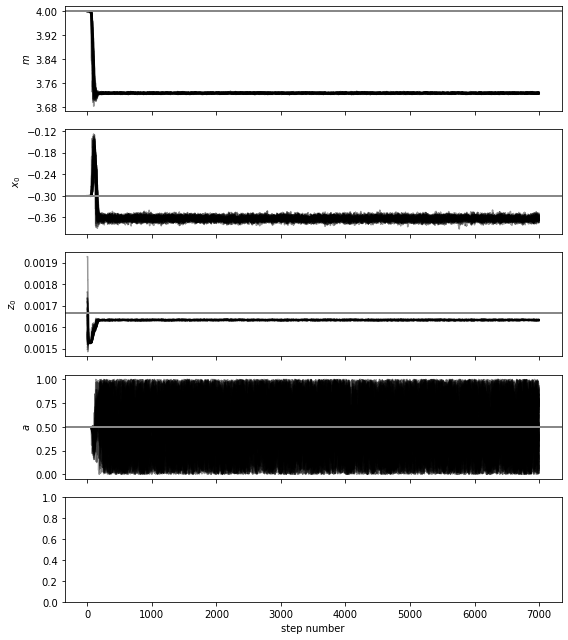

In [27]:
plt.clf()
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(8, 9))

axes[0].plot(sampler.chain[:, :, 0].T, color="k", alpha=0.4)
axes[0].yaxis.set_major_locator(MaxNLocator(5))
axes[0].axhline(Par1_true, color="#888888", lw=2)
axes[0].set_ylabel("$m$")

axes[1].plot(sampler.chain[:, :, 1].T, color="k", alpha=0.4)
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].axhline(Par2_true, color="#888888", lw=2)
axes[1].set_ylabel("$x_0$")

axes[2].plot(sampler.chain[:, :, 2].T, color="k", alpha=0.4)
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].axhline(Par3_true, color="#888888", lw=2)
axes[2].set_ylabel("$z_0$")


#axes[3].plot(sampler.chain[:, :, 3].T, color="k", alpha=0.4)
#axes[3].yaxis.set_major_locator(MaxNLocator(5))
#axes[3].axhline(Par4_true, color="#888888", lw=2)
#axes[3].set_ylabel("$a$")

axes[4].set_xlabel("step number")

fig.tight_layout()

#fig.savefig("Chains_Om_wde_w_Ho_OmBh2-PS1-BAO8p-CMBR_.png")
#fig.savefig("Chains_Om_wde_w_Ho_OmBh2-PS1-BAO8p-CMBR_.jpeg")
plt.show()

plt.close()

Measuring the lenght of the output array:

In [28]:
len(sampler.chain[:, :, 0]), len(sampler.chain[:, :, 0].T)

(30, 7000)

### Burn-in cut and putting together all the chains (nwalkers) for each parameter together:

In [29]:
# Choosing the Burn-in an creating the sample of data.
burnin = 300
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))

#### Saving the data of the chains already trimmed by burn-in (IMPERATIVE!!)

In [30]:
# Saving the data of all the chains and parameters
np.savetxt('TrimBurnin_Cut_300_R_.dat', samples)

#### Saving the full data (without trimmed of burn-in) and the $\chi^2$ value (OPTIONAL)

This table can be useful to plot the data and find the credible regions from the value of chi^2.

The saved file contains the -full- data (i.e., without trimmed from burn-in) of the parameters + the respective chi^2 value.

In [31]:
chi2values=-2.*sampler.flatlnprobability
NoTrimDataParam_Chi2=np.column_stack((sampler.flatchain, chi2values))
len(NoTrimDataParam_Chi2),len(NoTrimDataParam_Chi2.T)

(210000, 5)

In [32]:
# Saving the data
np.savetxt('NoTrimDataParam_Chi2_R_.dat', NoTrimDataParam_Chi2)

## Plotting the credible regions:

In [33]:
#help(triangle.corner)

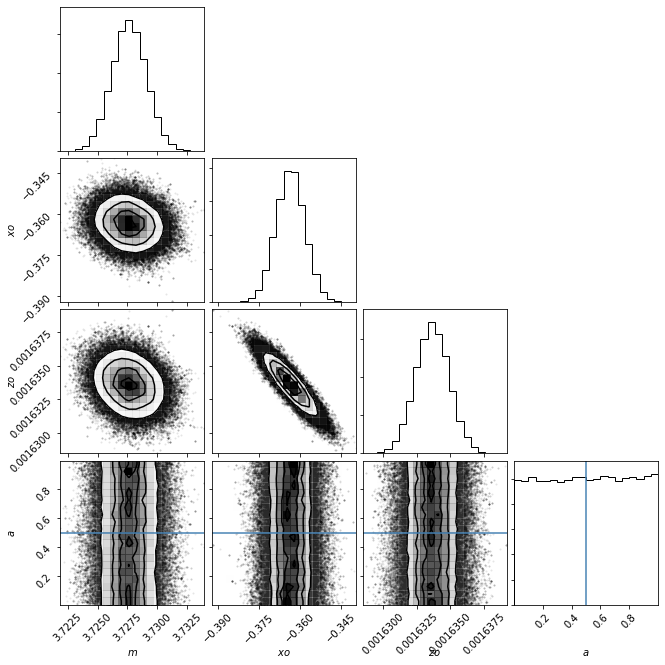

In [34]:
# Make the triangle plot.

fig = corner.corner(samples, labels=["$m$", "$xo$", "$zo$"],
                      truths=[Par1_true, Par2_true, Par3_true])

plt.show()
# fig.savefig("CredReg_Om_wde_w_Ho_OmBh2-PS1-BAO8p-CMBR_.jpeg")
#fig.savefig("CredReg_Om_wde_w_Ho_OmBh2-PS1-BAO8p-CMBR_.png")

plt.close()

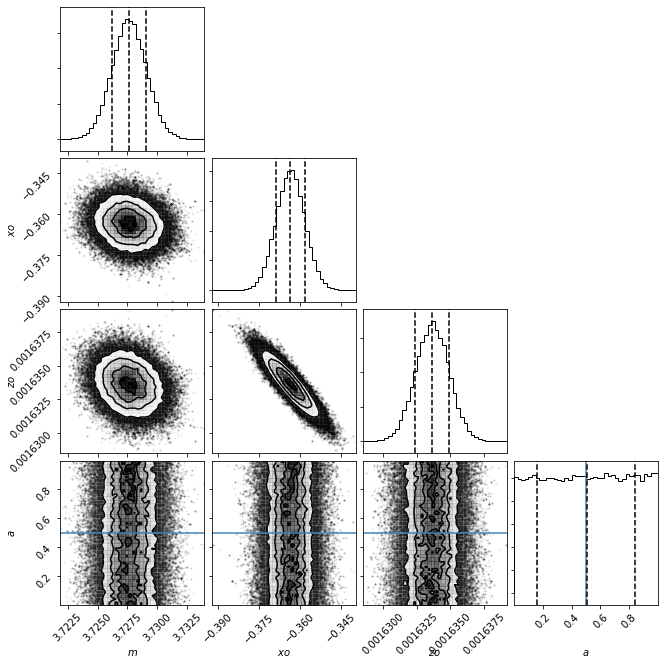

In [35]:
# All the other options

# quantiles=[0.16, 0.50, 0.84]  <-- Quantile lines in marginalized CR
# bins= xxx <-- number of bins to divide the data points in the contour plots. 
#    The smaller the value, the smoother the plot. Default value is about "bins=50"
# plot_datapoints = False  <-- Do not plot the points of the MCMC (default: True)
# plot_ellipse=True
# extents=[(1, 5), (1, 8),(0, 10)] # Example for 3 parameters
# scale_hist = False

fig = corner.corner(samples, labels=["$m$", "$xo$", "$zo$"],
                      truths=[Par1_true, Par2_true, Par3_true],
                      quantiles=[0.16, 0.50, 0.84], 
                      bins=40,
                      plot_datapoints = True,
                      scale_hist=True)

# fig.savefig("CredReg_Bin40_.jpeg") 
# fig.savefig("CredReg_Q_Bin50_.png") 
plt.show() # OK.

plt.close()

# Computing the median and quantiles

In [36]:
# Computing the MEAN

np.mean(samples, axis=0)

array([ 3.72763133e+00, -3.63525690e-01,  1.63363941e-03,  5.02978460e-01])

In [37]:
# Computing the STANDARD DEVIATION
np.std(samples, axis=0)

array([1.44959037e-03, 5.29541257e-03, 1.25619171e-06, 2.89067871e-01])

In [38]:
# Computing the percentile.
Par1_mcmc, Par2_mcmc, Par3_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
print("""MCMC result:
    Par1 = {0[0]} +{0[1]} -{0[2]} (Initial guess: {1})
    Par2 = {2[0]} +{2[1]} -{2[2]} (Initial guess: {3})
    Par3 = {4[0]} +{4[1]} -{4[2]} (Initial guess: {5})
""".format(Par1_mcmc, Par1_true, 
           Par2_mcmc, Par2_true,
           Par3_mcmc, Par3_true))

MCMC result:
    Par1 = 3.7276222499474785 +0.0014512994943669533 -0.001427535191876217 (Initial guess: 4.0)
    Par2 = -0.3635067837534981 +0.005214909854679595 -0.005278724819935854 (Initial guess: -0.3)
    Par3 = 0.0016336411803999753 +1.2417195184972162e-06 -1.2476159537556757e-06 (Initial guess: 0.0016678204759907602)
    Par4 = 0.5038542051381484 +0.3391721725233201 -0.3424040736932383 (Initial guess: 0.5)

